## Import neccessary libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import joblib

# # Data collection

In [11]:
# Read the dataset and store it in dataframe (df)
df = pd.read_csv("Dataset/url_data_modified.csv")

#### Analyze the data

In [12]:
# Retrieve first 5 rows
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [13]:
# Empty values count for each column
df.isnull().sum()

Domain           0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [14]:
# Drop unwanted columns ('Domain','Web_Traffic')
df = df.drop(['Domain','Web_Traffic'], axis=1)

In [15]:
# Retrieve first 5 rows
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0


# # Data splitting

In [16]:
# Store features and target separately
X = df.drop('Label', axis=1) # Features
y = df['Label'] # Target

# Split the data (traing data = 80%, testing data 20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# # Algorithm implementation

In [17]:
# Import neccessary libraries for algorithm implementation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy for Random Forest: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84      1024
           1       0.88      0.76      0.82      1056

    accuracy                           0.83      2080
   macro avg       0.83      0.83      0.83      2080
weighted avg       0.83      0.83      0.83      2080

Confusion Matrix:
 [[920 104]
 [257 799]]


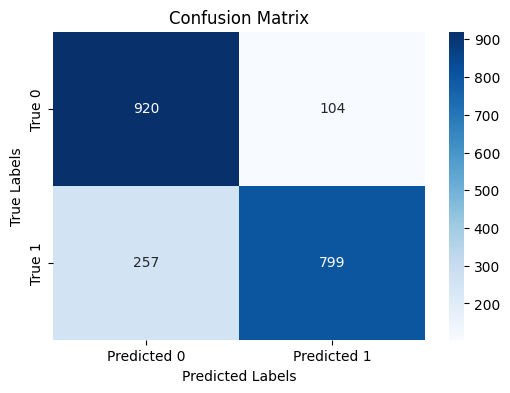

['Models/random_forest_model.joblib']

In [18]:
# builf Random forest model

# Initialize random forest
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Random Forest: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Predicted 0', 'Predicted 1'], 
             yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(clf, 'Models/random_forest_model.joblib')

Accuracy for AdaBoost: 0.80
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81      1024
           1       0.85      0.73      0.78      1056

    accuracy                           0.80      2080
   macro avg       0.80      0.80      0.80      2080
weighted avg       0.80      0.80      0.80      2080

Confusion Matrix:
 [[887 137]
 [286 770]]


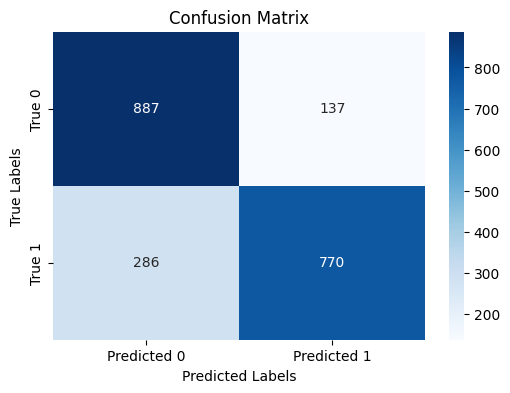

['Models/Adaboost_model.joblib']

In [19]:
# builf AdaBoost model

# Initialize AdaBoost Classifier
clf = AdaBoostClassifier()

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for AdaBoost: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Predicted 0', 'Predicted 1'], 
             yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(clf, 'Models/Adaboost_model.joblib')

Accuracy for XGB: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84      1024
           1       0.89      0.75      0.82      1056

    accuracy                           0.83      2080
   macro avg       0.83      0.83      0.83      2080
weighted avg       0.84      0.83      0.83      2080

Confusion Matrix:
 [[926  98]
 [262 794]]


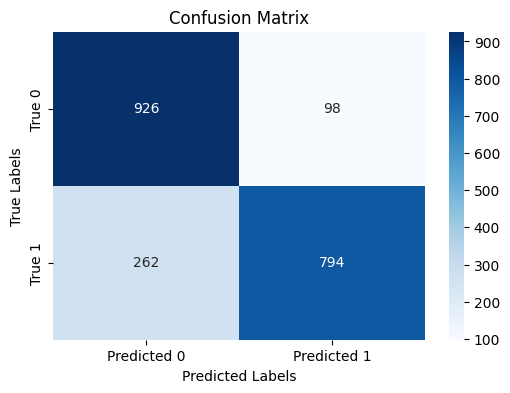

['Models/XGB_model.joblib']

In [20]:
# builf XGB model

# Initialize XGB Classifier
clf = XGBClassifier()

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for XGB: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Predicted 0', 'Predicted 1'], 
             yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(clf, 'Models/XGB_model.joblib')

Accuracy for SVC: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.95      0.81      1024
           1       0.92      0.63      0.75      1056

    accuracy                           0.78      2080
   macro avg       0.82      0.79      0.78      2080
weighted avg       0.82      0.78      0.78      2080

Confusion Matrix:
 [[968  56]
 [393 663]]


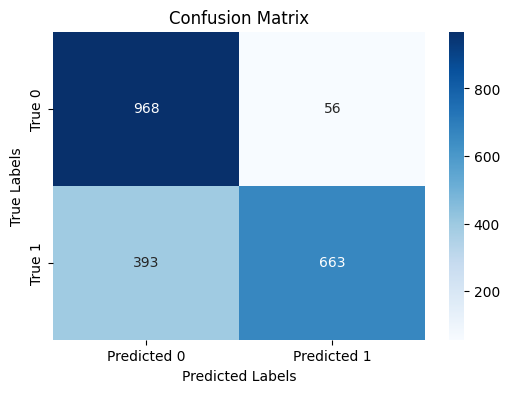

['Models/SVC_model.joblib']

In [21]:
# builf Support Vector Classifier model

# Initialize SVC
clf = SVC(kernel='linear')

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for SVC: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Predicted 0', 'Predicted 1'], 
             yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(clf, 'Models/SVC_model.joblib')

Accuracy for GradientBoost: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.83      1024
           1       0.91      0.71      0.80      1056

    accuracy                           0.82      2080
   macro avg       0.83      0.82      0.82      2080
weighted avg       0.84      0.82      0.82      2080

Confusion Matrix:
 [[950  74]
 [304 752]]


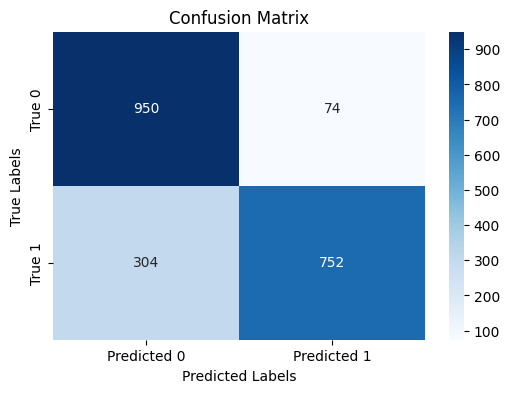

['Models/Gradient_Boost_model.joblib']

In [22]:
# builf Gradient Boost model

# Initialize Gradient Boosting Classifier
clf = GradientBoostingClassifier()

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for GradientBoost: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Predicted 0', 'Predicted 1'], 
             yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(clf, 'Models/Gradient_Boost_model.joblib')

Accuracy for Stacking Classifier: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84      1024
           1       0.88      0.77      0.82      1056

    accuracy                           0.83      2080
   macro avg       0.83      0.83      0.83      2080
weighted avg       0.83      0.83      0.83      2080

Confusion Matrix:
 [[909 115]
 [241 815]]


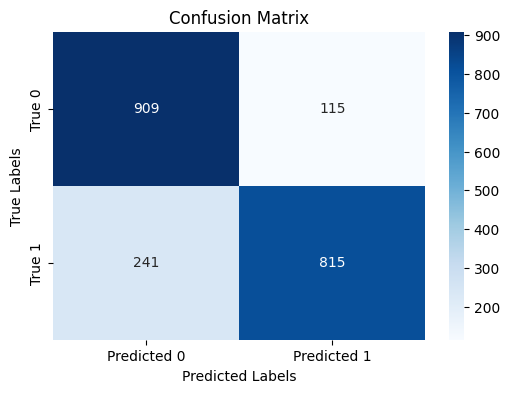

['Models/Stacking_classifier_model.joblib']

In [23]:
# builf Stacking Classifier model

# Initialize Stacking Classifier
rf = RandomForestClassifier()
xgb = XGBClassifier()
clf = StackingClassifier(estimators=[('Random Forest', rf), ('XGBoost', xgb)])

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Stacking Classifier: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Predicted 0', 'Predicted 1'], 
             yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(clf, 'Models/Stacking_classifier_model.joblib')

Accuracy for Voting classifier: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84      1024
           1       0.89      0.75      0.81      1056

    accuracy                           0.83      2080
   macro avg       0.83      0.83      0.82      2080
weighted avg       0.83      0.83      0.82      2080

Confusion Matrix:
 [[926  98]
 [265 791]]


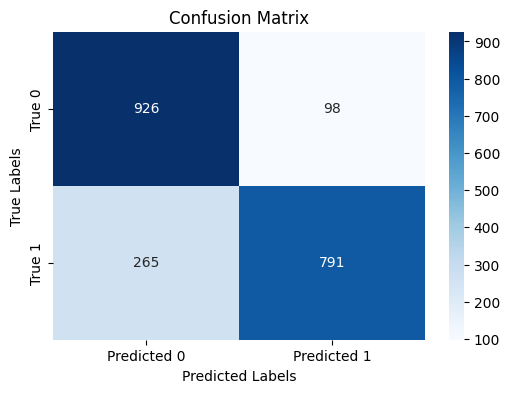

['Models/Voting_classifier_model.joblib']

In [24]:
# builf Voting Classifier model

# Initialize Voting Classifier
rf = RandomForestClassifier()
xgb = XGBClassifier()
clf = VotingClassifier(estimators=[('Random Forest', rf), ('XGBoost', xgb)], voting='hard')

# Train the model
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Voting classifier: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['Predicted 0', 'Predicted 1'], 
             yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the model
joblib.dump(clf, 'Models/Voting_classifier_model.joblib')

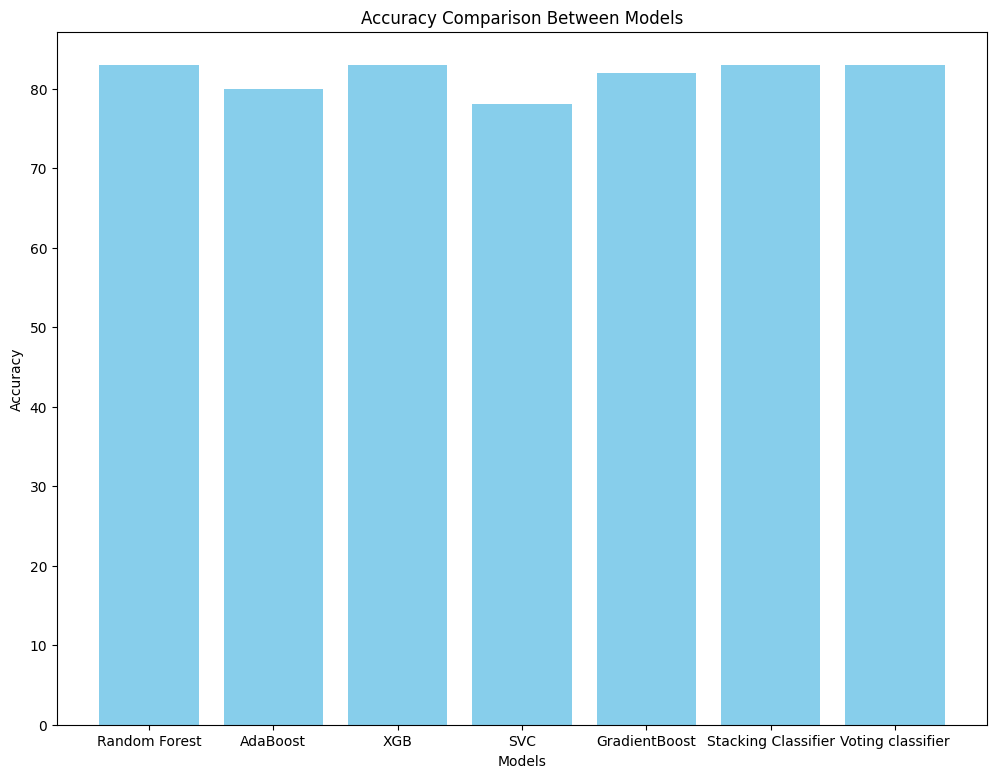

In [25]:
import matplotlib.pyplot as plt

# Model and corresponding accuracies
models = ["Random Forest", "AdaBoost", "XGB", "SVC", "GradientBoost", "Stacking Classifier", "Voting classifier"]
accuracies = [83, 80, 83, 78, 82, 83, 83]

# Plotting the Accuracy Comparison
plt.figure(figsize=(12, 9))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Models')
plt.show()

# # Prediction part

In [5]:
import joblib
model = joblib.load(r"Models\random_forest_model.joblib")

def prediction_func(input):
    prediction = model.predict([input])

    if prediction == 0:
        print('This is a Legitimate website')
    else:
        print('This is a Phishing website')

In [6]:
# Example for Legitimate website
prediction_func([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

This is a Legitimate website


c:\Users\0877\.conda\envs\tk173348\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
# Example for Phishing website
prediction_func([0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

This is a Phishing website


c:\Users\0877\.conda\envs\tk173348\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
